In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("vgsales.csv")


In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
# data clean
df = df.drop(columns=['Rank'])
df.rename(columns={ 'NA_Sales': 'America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales' : 'Other', 'Global_Sales' : 'Global' }, inplace = True)

df['Year'].fillna(0, inplace=True)
df['Year'] = df['Year'].astype('int')

df.set_index('Name', inplace=True)
df.drop(columns = [df.columns[0]], inplace = True)

In [7]:
n_50 = df.sort_values('Global', ascending=False).head(50)['Global']

<AxesSubplot:xlabel='Name'>

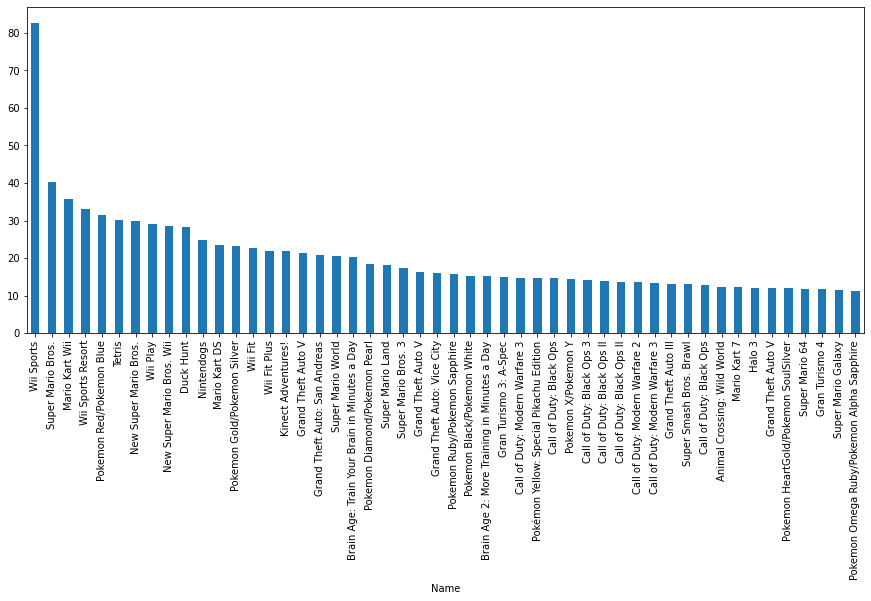

In [8]:
n_50.plot(kind="bar", figsize = (15,6))

<AxesSubplot:xlabel='Publisher'>

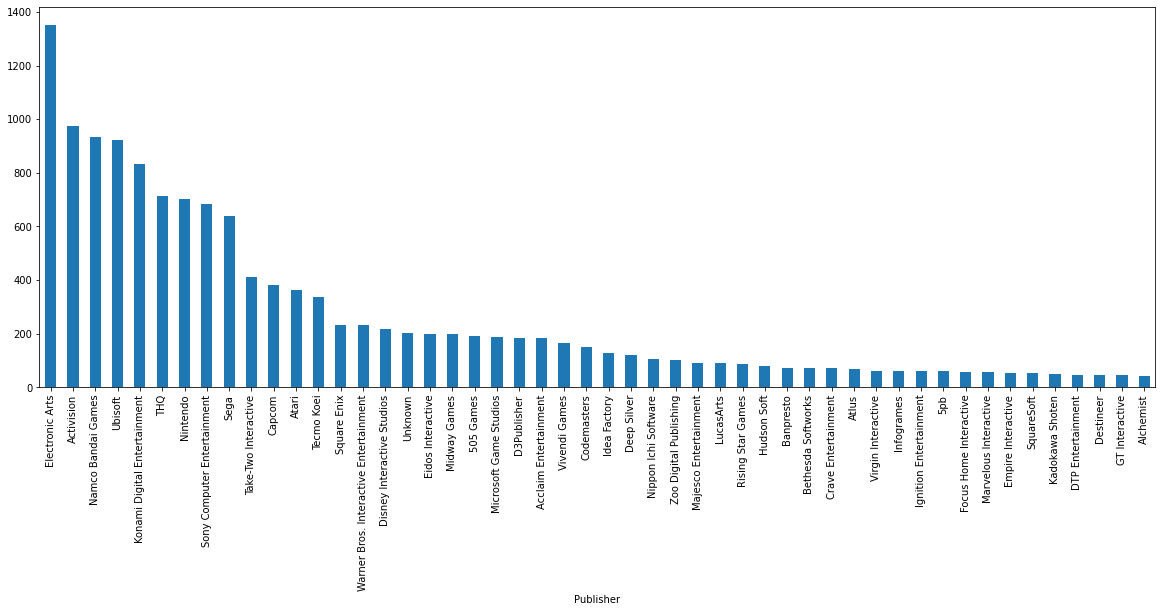

In [9]:
df.groupby('Publisher').count().sort_values('Genre')['Genre'][::-1].head(50).plot(kind='bar', figsize = (20, 7))


<AxesSubplot:xlabel='Year'>

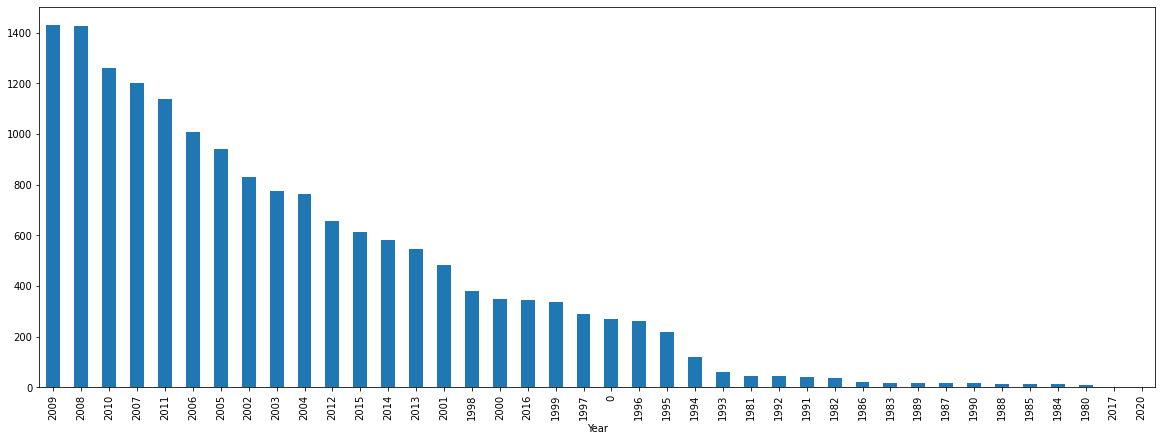

In [10]:
df.groupby('Year').count().sort_values('Global')['Global'][::-1].plot(kind='bar', figsize = (20, 7))


<AxesSubplot:xlabel='Genre'>

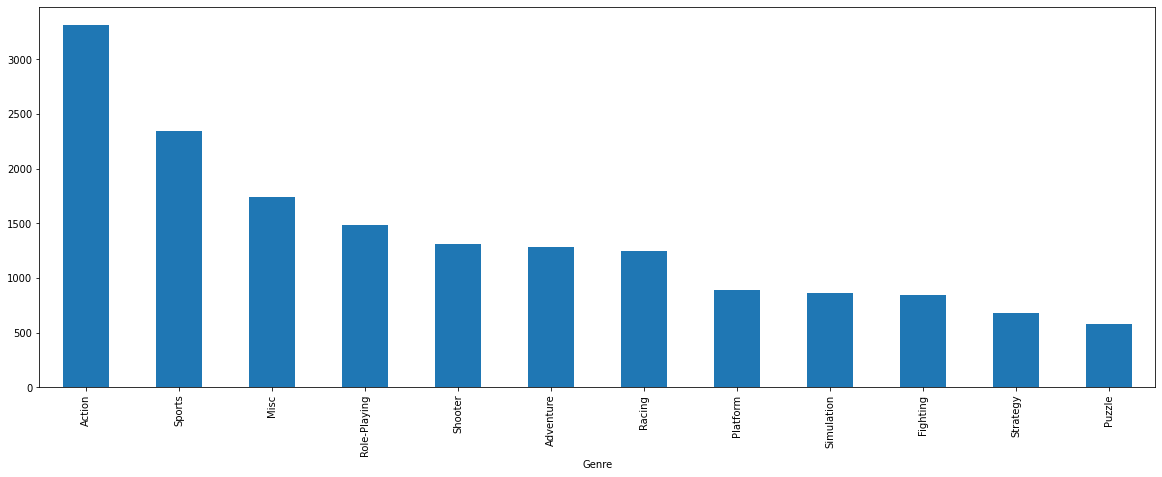

In [11]:
df.groupby('Genre').count().sort_values('Global')['Global'][::-1].plot(kind='bar', figsize = (20, 7))


<AxesSubplot:xlabel='Japan'>

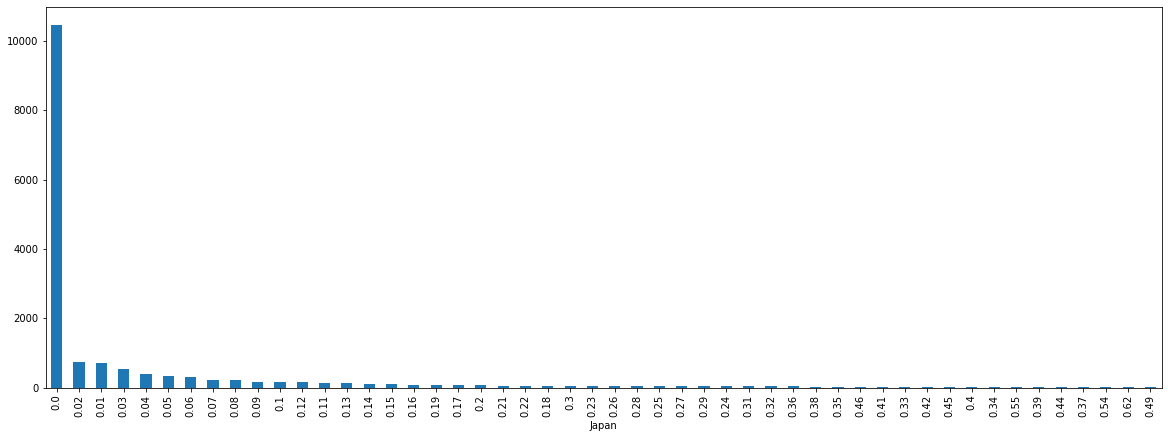

In [12]:
df.groupby('Japan').count().sort_values('Year')['Global'][::-1].head(50).plot(kind='bar', figsize = (20, 7))
